# <h1><center>Spatial Data Science </center></h1>
   ## <h1><center>Spatial Data Science : Proximity Analysis and interactive data visualization on map view</center></h1>


#### Importing following libraries for achieving a proximity analysis between old and new sites data and then rendering them on an interactive map view

In [2]:
import geopandas as gpd
import folium
import pandas as pd
from shapely.ops import nearest_points
from shapely.geometry import LineString
import random
import string

#### Reading an existing analyzed shape file data using geopandas read_file function to render it using Folium

In [3]:
old_sites = pd.read_excel("data/Copy of Budget Sites.xlsx",sheet_name='old_fibre_sites')
new_sites = pd.read_excel("data/Copy of Budget Sites.xlsx",sheet_name='New_Sites')

In [4]:
old_sites.to_csv("data/Budget Sites.csv",index=None,header=True) 

new_sites.to_csv("data/Budget Sites new.csv",index=None,header=True) 

In [6]:
new_sites_csv= pd.read_csv("data/Budget Sites new.csv")
old_sites_csv= pd.read_csv("data/Budget Sites.csv")

In [5]:
new_sites_csv.head()
new_sites_csv.shape


In [1]:
old_sites_csv.head()
old_sites_csv.shape


#### Correcting Column in the dataframes

In [3]:
new_sites_csv = new_sites_csv.rename(columns={'Site Name':'NEW_SITE_NAME'})
new_sites_csv.head()
new_sites_csv.shape


In [4]:
old_sites_csv = old_sites_csv.rename(columns={'LRP RAN Site name':'OLD_SITE_NAME'})
old_sites_csv.head()
old_sites_csv.shape


#### Replacing values of columns using a random string

In [11]:
N=7
res= ''.join(random.choices(string.ascii_uppercase+string.digits,k=N))
res

'1BXEOQV'

In [12]:
  def gen_str(N=7,char=string.ascii_uppercase+string.digits):
        return ''.join(random.choice(char) for i in range(N))
    
    #new_sites.replace(to_replace=new_sites['SITE_ID'].values,value=''.join(random.choices(string.ascii_uppercase+string.digits,k=N)),inplace=True)
gen_str()


'0RQ4V6A'

In [16]:
old_sites_csv.replace(to_replace=old_sites_csv['OLD_SITE_NAME'].values,value=gen_str(),inplace=True)
old_sites_csv.replace(to_replace=old_sites_csv['Vendor'].values,value=gen_str(),inplace=True)
old_sites_csv.replace(to_replace=old_sites_csv['Region'].values,value=gen_str(),inplace=True)

In [19]:
new_sites_csv.replace(to_replace=new_sites_csv['NEW_SITE_NAME'].values,value=gen_str(),inplace=True)
new_sites_csv.replace(to_replace=new_sites_csv['Site ID'].values,value=gen_str(),inplace=True)
new_sites_csv.replace(to_replace=new_sites_csv['Region'].values,value=gen_str(),inplace=True)

In [6]:
new_sites_csv.head()


In [7]:
old_sites_csv.head()


#### Transforming a panda dataframe into a geopanda data frame by creating a point geometry of coordinates supplied

In [23]:
old_sites_df= gpd.GeoDataFrame(old_sites_csv,geometry=gpd.points_from_xy(old_sites_csv['Longitude'],old_sites_csv['Latitude']),crs='epsg:4326')

In [8]:
old_sites_df.head()

<AxesSubplot:>

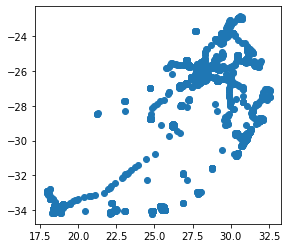

In [23]:
old_sites_df.plot()

In [24]:
old_sites_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
new_sites_df= gpd.GeoDataFrame(new_sites_csv,geometry=gpd.points_from_xy(new_sites_csv['Long'],new_sites_csv['Lat']),crs='epsg:4326')

#### Removing null values if any from dataframe

In [27]:
old_sites_df.isnull().sum()

Region                0
OLD_SITE_NAME         0
Current Medium LRP    0
Vendor                0
Latitude              7
Longitude             7
geometry              0
dtype: int64

In [28]:
old_sites_df=old_sites_df.dropna()

In [29]:
old_sites_df.isnull().sum()

Region                0
OLD_SITE_NAME         0
Current Medium LRP    0
Vendor                0
Latitude              0
Longitude             0
geometry              0
dtype: int64

In [30]:
new_sites_df.isnull().sum()

Site ID          0
Lat              0
Long             0
Region           0
NEW_SITE_NAME    0
geometry         0
dtype: int64

#### Calulating nearest neighbour ,then generating a line geometry between the two point geometries within a 1200 meter distance between two points

In [31]:
#changing crs to the one having unit as meters such as 3857
new_sites_df_meters=new_sites_df.to_crs(epsg=3857)
new_sites_df_meters.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
old_sites_df_meters=old_sites_df.to_crs(epsg=3857)
old_sites_df_meters.head()


In [33]:
#defining a method to calculate nearest geometry making use of unary_union
def calculate_nearest(df, destination, val, col='geometry'):
    dest_unary = destination.unary_union
    nearest_geom = nearest_points(df[col], dest_unary)
    geom_match = destination.loc[destination.geometry == nearest_geom[1]]
    matched_value = geom_match[val].to_numpy()[0]
    return matched_value

In [10]:
#adding a new column with the nearest geometry value obtained by application of above method
#new_sites_df_meters["nearest_geometry"] = new_sites_df_meters.apply(calculate_nearest, destination=old_sites_df_meters, val="geometry", axis=1)
#new_sites_df_meters.head()
print()

In [11]:
#adding a new column that will represent the nearest old site name close to the corrsponding new site
#new_sites_df_meters["nearest_old_site"] = new_sites_df_meters.apply(calculate_nearest, destination=old_sites_df_meters, val="OLD_SITE_NAME", axis=1)
#new_sites_df_meters.head()
print()

In [36]:
#creating a line geometry column in new site dataframe 
new_sites_df_meters['line'] = new_sites_df_meters.apply(lambda row: LineString([row['geometry'], row['nearest_geometry']]), axis=1)

new_sites_df_meters.shape

(2630, 9)

In [37]:
#defining a method to add distance between corresponding new and old site geometries
def get_distance(row):
    distance = row.geometry.distance(row.nearest_geometry)
    print(distance)
    return distance

In [38]:
#adding a new column in new site df to reflect distance values
new_sites_df_meters['distance'] = new_sites_df_meters.apply(lambda row: get_distance(row), axis=1)

151.65075475086033
567.59436703387
1213.600128336277
16072.791439254344
16887.184873006416
14504.556414881106
675.9648489024046
735.4084301930593
522.8038765825731
1394.5686813195666
17836.380607852774
981.8466285209789
636.4863016715524
1072.6300644825744
15587.208338716297
786.6188394925234
853.2823267200904
615.2584098380288
22476.9649462942
1102.8064976504354
364.9294167831034
895.5145475908023
763.4278569744762
962.5204808760852
1078.4722349310905
1052.1891091165705
844.2249778202068
1076.4612436048087
14150.758466357467
714.3668530247684
1005.7353642125809
1226.4068656248994
986.0511012673845
4110.569746543144
5098.907589552847
1104.170940637828
1554.039103175332
547.5609688037227
3084.6566256509495
733.4328442150414
67617.42736165154
1517.0094999027117
14370.908072171513
725.0764539447663
1130.626904719455
550.8232500258746
906.964341866683
11375.309204647727
15902.311672307265
101.4826393516271
3046.960434144886
1578.1047681515652
1228.786456754648
442.5566136698619
8020.257953

In [39]:
new_sites_df_meters.shape

(2630, 10)

#### Changing crs back to degree decimal format, enable proper representation making use of folium for interactive map

In [41]:
old_sites_df_wgs84=old_sites_df_meters.to_crs(epsg=4326)
old_sites_df_wgs84.head()

,Region,OLD_SITE_NAME,Current Medium LRP,Vendor,Latitude,Longitude,geometry
0,DQC6K6D,9WOO73M,Fibre,9FUT68Z,-27.645109,27.214205,POINT (27.21420 -27.64511)
1,DQC6K6D,9WOO73M,Fibre,9FUT68Z,-28.728268,24.742073,POINT (24.74207 -28.72827)
2,DQC6K6D,9WOO73M,Fibre,9FUT68Z,-29.182985,26.231235,POINT (26.23124 -29.18298)
3,DQC6K6D,9WOO73M,Fibre,9FUT68Z,-29.129853,26.177353,POINT (26.17735 -29.12985)
4,DQC6K6D,9WOO73M,Fibre,9FUT68Z,-27.639707,27.230742,POINT (27.23074 -27.63971)


In [12]:
new_sites_df_ws_84=new_sites_df_meters.set_geometry('line')
new_sites_df_ws_84.geom_type
new_sites_df_ws_84.to_crs(epsg=4326)


#### Limiting dataframe values to records where distance is less than 1200 meters

In [13]:
new_sites_df_ws_84=new_sites_df_ws_84[new_sites_df_ws_84['distance'] < 1200]
new_sites_df_ws_84.shape


In [47]:
nearest_line=new_sites_df_ws_84[['Site ID','nearest_old_site','line','distance']].set_geometry('line')

In [48]:
nearest_line_wgs84=nearest_line.to_crs(epsg=4326)
nearest_line_wgs84.geometry

0       LINESTRING (27.98458 -26.23383, 27.98444 -26.2...
1       LINESTRING (27.92860 -26.09040, 27.92657 -26.0...
6       LINESTRING (29.09441 -26.52435, 29.09303 -26.5...
7       LINESTRING (29.08761 -26.52625, 29.09303 -26.5...
8       LINESTRING (29.08690 -26.53715, 29.08644 -26.5...
                              ...                        
2547    LINESTRING (28.27764 -25.78084, 28.27727 -25.7...
2557    LINESTRING (18.46207 -33.96623, 18.46447 -33.9...
2567    LINESTRING (20.86338 -33.19453, 20.85935 -33.1...
2604    LINESTRING (22.95397 -32.07545, 22.95164 -32.0...
2615    LINESTRING (31.03505 -29.83654, 31.03508 -29.8...
Name: line, Length: 1115, dtype: geometry

#### buffer of 1200 meters 

In [49]:
nearest_line_wgs84=nearest_line_wgs84[nearest_line_wgs84['distance'] < 1200]
nearest_line_wgs84.shape

(1115, 4)

<AxesSubplot:>

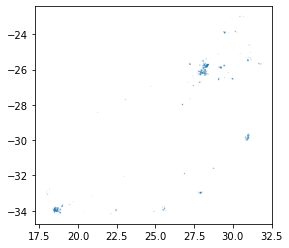

In [50]:
nearest_line_wgs84.plot()

In [259]:
nearest_line_wgs84=nearest_line_wgs84.rename(columns={'distance':'Distance in meters: '})

In [260]:
nearest_line_wgs84.shape

(1115, 4)

In [15]:
new_sites_df_ws_84.crs
new_sites_df_ws_84=new_sites_df_ws_84.set_geometry('geometry')
new_sites_df_ws_84=new_sites_df_ws_84.to_crs(epsg=4326)
new_sites_df_ws_84.geometry
new_sites_df_ws_84.head()
new_sites_df_ws_84.shape


In [14]:
new_sites_df_ws_84=new_sites_df_ws_84.to_crs(epsg=4326)
new_sites_df_ws_84.head()


#### Setting map location as per requirement for example South Africa 

In [46]:
m = folium.Map(location= [-28.4792625,24.6727135],zoom_start=6)
m

####  Visualization of data on Map

In [225]:
labels_new = list(new_sites_df_ws_84.NEW_SITE_NAME)
x_coord = list(new_sites_df_ws_84.geometry.x)
y_coord = list(new_sites_df_ws_84.geometry.y)
m = folium.Map([-28.4792625,24.6727135], zoom_start=5, tiles='cartodbpositron')
for lat,lon,labels_new in zip(y_coord,x_coord,labels_new):
    folium.Circle(location=[lat,lon],color='green', radius=0.19,popup=labels_new).add_to(m)
m
m.save('new_sites_using_csv.html')


In [266]:

m = folium.Map([-28.4792625,24.6727135], zoom_start=5, tiles='cartodbpositron')
style = {'fillColor': 'black', 'color': 'black'}
folium.GeoJson(nearest_line_wgs84.sample(1000),style_function=lambda x: style,popup=folium.GeoJsonPopup(fields=['Distance in meters: ']),tooltip=folium.GeoJsonTooltip(fields=['Distance in meters: '])).add_to(m)
m
#m.save('line.html')

#### Data visualization on an interactive map view showing data with useful information in tooltip,color and location

In [269]:
m = folium.Map([-28.4792625,24.6727135], zoom_start=5, tiles='Stamen Terrain')
#We want to add site name as a tooltip so for this we will create a list as shown below
labels_new = list(new_sites_df_ws_84.NEW_SITE_NAME)
x_coord = list(new_sites_df_ws_84.geometry.x)
y_coord = list(new_sites_df_ws_84.geometry.y)

for lat,lon,labels_new in zip(y_coord,x_coord,labels_new):
    folium.Circle(location=[lat,lon],color='green',fill_color='green', radius=50,popup=labels_new,tooltip=labels_new).add_to(m)

labels_old = list(old_sites_df_wgs84.OLD_SITE_NAME)
x_coord = list(old_sites_df_wgs84.geometry.x)
y_coord = list(old_sites_df_wgs84.geometry.y)

for lat,lon,labels_old in zip(y_coord,x_coord,labels_old):
    folium.Circle(location=[lat,lon],color='red',fill_color='red', radius=50,popup=labels_old,tooltip=labels_old).add_to(m)
#To style line geomtery we need to create a dictionary and use style fucntion lamda,also GeoJsonTooltip provides a way to add tooltip for the line geometry
style = {'fillColor': 'black', 'color': 'black',"stroke-width":0.001,
        "fill-opacity":0.6}
folium.GeoJson(nearest_line_wgs84,popup=folium.GeoJsonPopup(fields=['Distance in meters: ']),style_function=lambda x: style,tooltip=folium.GeoJsonTooltip(fields=['Distance in meters: '])).add_to(m)

folium.TileLayer('openstreetmap').add_to(m)

folium.LayerControl().add_to(m)

m.save('data_analysis_map_using_csv.html')

In [275]:
# Marker Cluster

x_coord = list(new_sites_df_ws_84.geometry.x)
y_coord = list(new_sites_df_ws_84.geometry.y)



x1_coord = list(old_sites_df_wgs84.geometry.x)
y1_coord = list(old_sites_df_wgs84.geometry.y)

from folium.plugins import FastMarkerCluster

m1 = folium.Map(location=[-28.4792625,24.6727135],
                        zoom_start=2,
                        tiles='CartoDB dark_matter')

callback_new = """\
function (row) {
var icon, marker;
icon = L.AwesomeMarkers.icon({
icon: "map-marker", markerColor: "green"});
marker = L.marker(new L.LatLng(row[0], row[1]));
marker.setIcon(icon);
return marker;
};
"""
callback_old = """\
function (row) {
var icon, marker;
icon = L.AwesomeMarkers.icon({
icon: "map-marker", markerColor: "red"});
marker = L.marker(new L.LatLng(row[0], row[1]));
marker.setIcon(icon);
return marker;
};
"""

FastMarkerCluster(zip(y_coord,x_coord),callback=callback_new).add_to(m1)
FastMarkerCluster(zip(y1_coord,x1_coord),callback=callback_old).add_to(m1)

folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('cartodbpositron').add_to(m1)
folium.LayerControl().add_to(m1)
m1.save('data_analysis_map_cluster_from_csv.html')